In [317]:
import pandas as pd
import numpy as np
OAI = pd.read_csv("Online.csv")
TFI = pd.read_csv("TransferInfo.csv")
CTI = pd.read_csv("CustomerInfo.csv")
PDI = pd.read_csv("ProductInfo.csv")
CTI1 = CTI[CTI["clnt_gender"]!="unknown"]
TFI.shape

C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(599961, 9)

연령 별

In [318]:
CTI1["clnt_age"][CTI1["clnt_age"]=="10"] = "10-20"
CTI1["clnt_age"][CTI1["clnt_age"]=="20"] = "10-20"
CTI1["clnt_age"][CTI1["clnt_age"]=="50"] = "50-60"
CTI1["clnt_age"][CTI1["clnt_age"]=="60"] = "50-60"
CTI1

C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the i

,clnt_id,clnt_gender,clnt_age
1,2,F,30
8,9,F,40
11,12,F,40
19,20,F,30
21,22,M,30
22,23,F,40
23,24,F,40
28,29,F,40
36,38,F,40
38,40,F,30


연령 성별 검색어

In [5]:
merge2 = OAI.merge(CTI1,how = "inner", on="clnt_id")
merge2 = merge2[merge2["sech_kwd"].notnull()]
merge2

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,tot_pag_view_ct,tot_sess_hr_v,trfc_src,dvc_ctg_nm,clnt_gender,clnt_age
16,28304,1,13,0,A03,20190716,11:36,933562,NaN,비비고만두,56.0,1303.0,PUSH,mobile_web,F,50-60
17,28304,1,11,0,A03,20190716,11:35,820901,NaN,어묵,56.0,1303.0,PUSH,mobile_web,F,50-60
18,28304,1,16,0,A03,20190716,11:37,976904,NaN,고메핫도그,56.0,1303.0,PUSH,mobile_web,F,50-60
19,28304,1,10,0,A03,20190716,11:34,786138,NaN,핫도그,56.0,1303.0,PUSH,mobile_web,F,50-60
20,28304,1,9,0,A03,20190716,11:34,759117,NaN,어묵,56.0,1303.0,PUSH,mobile_web,F,50-60
21,28304,1,18,0,A03,20190716,11:38,1015222,NaN,비비고만두,56.0,1303.0,PUSH,mobile_web,F,50-60
1373,49353,28,14,0,A03,20190813,12:13,227981,NaN,서울우유,73.0,1418.0,PUSH,NaN,F,30
1374,49353,43,12,0,A03,20190825,19:49,649114,NaN,초코우유,18.0,754.0,PUSH,NaN,F,30
1375,49353,37,5,0,A03,20190821,19:49,60577,NaN,유료회원,12.0,113.0,PUSH,NaN,F,30
1376,49353,71,42,0,A03,20190923,14:53,892930,NaN,계란말이,51.0,1722.0,PUSH,NaN,F,30


In [6]:
mer = merge2[["sech_kwd","clnt_gender","clnt_age"]]

In [7]:
mat1 = mer[(mer["clnt_gender"]=="F")&(mer["clnt_age"]=="10-20")]
mat2 = mer[(mer["clnt_gender"]=="F")&(mer["clnt_age"]=="30")]
mat3 = mer[(mer["clnt_gender"]=="F")&(mer["clnt_age"]=="40")]
mat4 = mer[(mer["clnt_gender"]=="F")&(mer["clnt_age"]=="50-60")]
mat5 = mer[(mer["clnt_gender"]=="M")&(mer["clnt_age"]=="10-20")]
mat6 = mer[(mer["clnt_gender"]=="M")&(mer["clnt_age"]=="30")]
mat7 = mer[(mer["clnt_gender"]=="M")&(mer["clnt_age"]=="40")]
mat8 = mer[(mer["clnt_gender"]=="M")&(mer["clnt_age"]=="50-60")]

In [84]:
# np.save("F_10-20.npy", mat1)
# np.save("F_30.npy", mat2)
# np.save("F_40.npy", mat3)
# np.save("F_50_60.npy", mat4)
# np.save("M_10-20.npy", mat5)
# np.save("M_30.npy", mat6)
# np.save("M_40.npy", mat7)
# np.save("M_50_60.npy", mat8)

In [8]:
oai1 = OAI[["sech_kwd","trfc_src","dvc_ctg_nm"]]
oai1 = oai1[(oai1["sech_kwd"].notnull())&(oai1["dvc_ctg_nm"].notnull())]
oai1 = oai1[oai1["dvc_ctg_nm"]!="unknown"]
oai1["count"] = 1
oai1.shape

(348267, 4)

In [9]:
oai_pivot = pd.pivot_table(oai1, index='trfc_src', columns='dvc_ctg_nm', values='count',aggfunc=np.sum)
oai_pivot

dvc_ctg_nm,PC,mobile_app,mobile_web
trfc_src,,,
DIRECT,29947.0,305.0,36518.0
PORTAL_1,7983.0,NaN,8600.0
PORTAL_2,5160.0,NaN,2011.0
PORTAL_3,1276.0,NaN,1311.0
PUSH,17.0,NaN,25039.0
WEBSITE,7198.0,156.0,2777.0
unknown,17254.0,155276.0,47439.0


요일별 판매량/판매수

In [208]:
TFI[TFI["de_dt"]==20190917].sort_values(by = "buy_am", ascending=False).head()

,clnt_id,trans_id,trans_seq,biz_unit,pd_c,de_dt,de_tm,buy_am,buy_ct
19237,50600,102331,5,A03,0382,20190917,14:19,100000016899,1
576630,46019,102920,1,A02,1504,20190917,22:42,2890600,2
595312,8810,102604,1,A01,0493,20190917,12:29,2370000,1
575166,61923,102845,1,A02,1636,20190917,15:21,1909610,1
583341,9678,102785,1,A02,0742,20190917,11:00,1814100,3


In [319]:
TFI = TFI[TFI["pd_c"].notnull()]
TFI = TFI[(TFI["buy_am"]<100000000)&(TFI["buy_am"]!=0)&(TFI["buy_ct"]!=0)]
tfi1 = TFI[["de_dt","buy_am","buy_ct"]]
tfi1['de_dt'] = pd.to_datetime(tfi1['de_dt'], format='%Y%m%d')
tfi1['day_of_week'] = tfi1["de_dt"].dt.weekday_name

C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


<IPython.core.display.Javascript object>


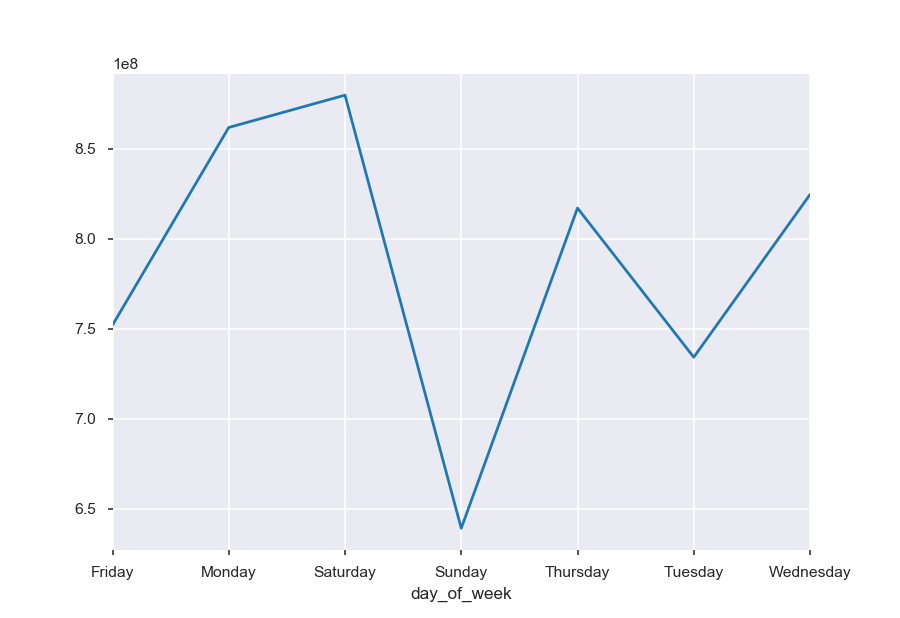

In [313]:
tf3 = tfi1.groupby("de_dt").sum()["buy_am"]
tf4 = tfi1.groupby("de_dt").sum()["buy_ct"]
tf1 = tfi1.groupby("day_of_week").sum()["buy_ct"]
import matplotlib.pyplot as plt
tf2 = tfi1.groupby("day_of_week").sum()["buy_am"]
%matplotlib notebook
tf2.plot()

시간별 구매량

C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<IPython.core.display.Javascript object>


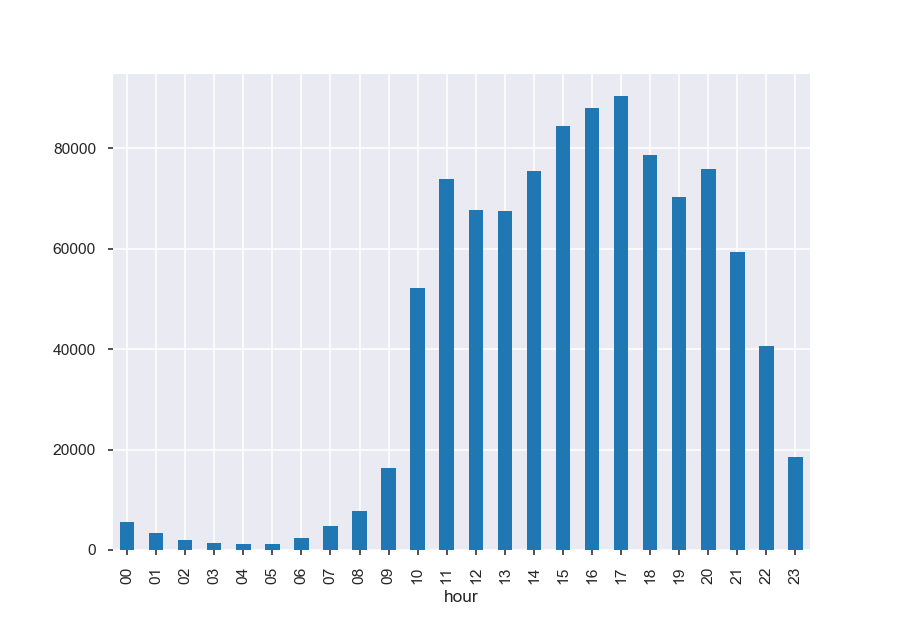

In [314]:
%matplotlib notebook
tfi2 = TFI[["de_tm","buy_am","buy_ct"]]
tfi2['hour'] = (pd.to_datetime(tfi2['de_tm'])).dt.strftime("%H")
buy_am_hour = tfi2.groupby("hour").sum()["buy_ct"]
buy_am_hour.plot(kind='bar')


성별/연령대별 선호 품목

In [12]:
merge3 = TFI.merge(CTI1,how = "inner", on="clnt_id")[["clnt_gender","clnt_age","pd_c"]]
merge3 = merge3[merge3["pd_c"]!="unknown"]
merge3["pd_c"] = merge3["pd_c"].astype(np.int32)

In [13]:
merge3["count"] = 1
prefer_pivot = pd.pivot_table(merge3, index="pd_c", columns=["clnt_gender","clnt_age"], values='count',aggfunc=np.sum)

In [213]:
a1 = prefer_pivot["F"]["10-20"].sort_values(ascending=False)[1:20].reset_index()
a2 = prefer_pivot["F"]["30"].sort_values(ascending=False)[1:20].reset_index()
a3 = prefer_pivot["F"]["40"].sort_values(ascending=False)[1:20].reset_index()
a4 = prefer_pivot["F"]["50-60"].sort_values(ascending=False)[1:20].reset_index()
a5 = prefer_pivot["M"]["10-20"].sort_values(ascending=False)[1:20].reset_index()
a6 = prefer_pivot["M"]["30"].sort_values(ascending=False)[1:20].reset_index()
a7 = prefer_pivot["M"]["40"].sort_values(ascending=False)[1:20].reset_index()
a8 = prefer_pivot["M"]["50-60"].sort_values(ascending=False)[1:20].reset_index()

In [217]:
a11 = PDI.merge(a1.reset_index(), how= "inner", on="pd_c")[["pd_c","clac_nm1"]]
a22 = PDI.merge(a2.reset_index(), how= "inner", on="pd_c")[["pd_c","clac_nm1"]]
a33 = PDI.merge(a3.reset_index(), how= "inner", on="pd_c")[["pd_c","clac_nm1"]]
a44 = PDI.merge(a4.reset_index(), how= "inner", on="pd_c")[["pd_c","clac_nm1"]]
a55 = PDI.merge(a5.reset_index(), how= "inner", on="pd_c")[["pd_c","clac_nm1"]]
a66 = PDI.merge(a6.reset_index(), how= "inner", on="pd_c")[["pd_c","clac_nm1"]]
a77 = PDI.merge(a7.reset_index(), how= "inner", on="pd_c")[["pd_c","clac_nm1"]]
a88 = PDI.merge(a8.reset_index(), how= "inner", on="pd_c")[["pd_c","clac_nm1"]]
a11

,pd_c,clac_nm1
0,109,Beverages
1,114,Beverages
2,347,Dairy Products
3,348,Dairy Products
4,354,Dairy Products
5,516,Frozen Foods
6,526,Frozen Foods
7,565,Fruits
8,864,Kitchenware
9,894,Liquors / Alcoholic Beverages


구매 환불 겹치는거 제거

In [263]:
oai1 = OAI[OAI["action_type"]==0]
oai7 = OAI[OAI["action_type"]==7].reset_index(drop=True)
oai6 = OAI[OAI["action_type"]==6]

In [264]:
from tqdm import tqdm
for i in tqdm(range(oai7.shape[0])):
    oai6 = oai6.drop(oai6[((oai6["clnt_id"]==oai7["clnt_id"][i])&(oai6["trans_id"]==oai7["trans_id"][i]))].index)







  0%|          | 0/5676 [00:00<?, ?it/s]





  0%|          | 7/5676 [00:00<01:30, 62.65it/s]





  0%|          | 14/5676 [00:00<01:30, 62.66it/s]





  0%|          | 21/5676 [00:00<01:30, 62.50it/s]





  0%|          | 28/5676 [00:00<01:28, 63.74it/s]





  1%|          | 34/5676 [00:00<01:30, 62.22it/s]





  1%|          | 41/5676 [00:00<01:29, 62.70it/s]





  1%|          | 48/5676 [00:00<01:28, 63.37it/s]





  1%|          | 55/5676 [00:00<01:26, 65.09it/s]





  1%|          | 62/5676 [00:00<01:26, 65.06it/s]





  1%|          | 69/5676 [00:01<01:28, 63.28it/s]





  1%|▏         | 76/5676 [00:01<01:28, 63.09it/s]





  1%|▏         | 83/5676 [00:01<01:27, 63.83it/s]





  2%|▏         | 90/5676 [00:01<01:28, 63.30it/s]





  2%|▏         | 97/5676 [00:01<01:30, 61.78it/s]





  2%|▏         | 104/5676 [00:01<01:32, 59.98it/s]





  2%|▏         | 111/5676 [00:01<01:29, 62.37it/s]





  2%|▏         | 118/5676 [00:01<01:30, 61.75it/s]





  2%|▏     

 10%|█         | 578/5676 [00:14<04:45, 17.84it/s]





 10%|█         | 580/5676 [00:14<04:40, 18.15it/s]





 10%|█         | 582/5676 [00:14<04:35, 18.48it/s]





 10%|█         | 584/5676 [00:15<04:31, 18.76it/s]





 10%|█         | 587/5676 [00:15<04:23, 19.28it/s]





 10%|█         | 589/5676 [00:15<04:24, 19.22it/s]





 10%|█         | 591/5676 [00:15<04:23, 19.28it/s]





 10%|█         | 593/5676 [00:15<04:24, 19.24it/s]





 10%|█         | 595/5676 [00:15<04:22, 19.37it/s]





 11%|█         | 597/5676 [00:15<04:33, 18.59it/s]





 11%|█         | 599/5676 [00:15<04:55, 17.15it/s]





 11%|█         | 601/5676 [00:16<05:11, 16.31it/s]





 11%|█         | 603/5676 [00:16<05:06, 16.55it/s]





 11%|█         | 605/5676 [00:16<05:02, 16.77it/s]





 11%|█         | 607/5676 [00:16<05:07, 16.50it/s]





 11%|█         | 609/5676 [00:16<05:18, 15.93it/s]





 11%|█         | 611/5676 [00:16<05:09, 16.36it/s]





 11%|█         | 613/5676 [00:16<05:00, 16.83it/

 19%|█▉        | 1103/5676 [00:29<03:57, 19.23it/s]





 19%|█▉        | 1106/5676 [00:29<04:11, 18.19it/s]





 20%|█▉        | 1109/5676 [00:29<04:26, 17.12it/s]





 20%|█▉        | 1111/5676 [00:29<04:32, 16.78it/s]





 20%|█▉        | 1113/5676 [00:30<04:40, 16.25it/s]





 20%|█▉        | 1115/5676 [00:30<04:55, 15.42it/s]





 20%|█▉        | 1117/5676 [00:30<04:45, 15.98it/s]





 20%|█▉        | 1119/5676 [00:30<04:56, 15.37it/s]





 20%|█▉        | 1121/5676 [00:30<05:13, 14.55it/s]





 20%|█▉        | 1123/5676 [00:30<05:22, 14.11it/s]





 20%|█▉        | 1125/5676 [00:30<05:36, 13.54it/s]





 20%|█▉        | 1127/5676 [00:31<05:39, 13.38it/s]





 20%|█▉        | 1129/5676 [00:31<05:40, 13.35it/s]





 20%|█▉        | 1131/5676 [00:31<05:45, 13.15it/s]





 20%|█▉        | 1133/5676 [00:31<05:43, 13.21it/s]





 20%|█▉        | 1135/5676 [00:31<05:44, 13.18it/s]





 20%|██        | 1137/5676 [00:31<05:27, 13.87it/s]





 20%|██        | 1139/5676 [00:

 28%|██▊       | 1604/5676 [00:45<03:48, 17.80it/s]





 28%|██▊       | 1607/5676 [00:45<03:56, 17.19it/s]





 28%|██▊       | 1610/5676 [00:45<03:58, 17.04it/s]





 28%|██▊       | 1612/5676 [00:45<04:02, 16.77it/s]





 28%|██▊       | 1614/5676 [00:45<03:55, 17.23it/s]





 28%|██▊       | 1616/5676 [00:45<03:48, 17.75it/s]





 29%|██▊       | 1618/5676 [00:46<04:50, 13.97it/s]





 29%|██▊       | 1620/5676 [00:46<04:28, 15.09it/s]





 29%|██▊       | 1622/5676 [00:46<04:09, 16.26it/s]





 29%|██▊       | 1624/5676 [00:46<04:10, 16.16it/s]





 29%|██▊       | 1626/5676 [00:46<04:14, 15.89it/s]





 29%|██▊       | 1628/5676 [00:46<04:29, 15.01it/s]





 29%|██▊       | 1630/5676 [00:46<04:33, 14.79it/s]





 29%|██▉       | 1632/5676 [00:47<04:28, 15.05it/s]





 29%|██▉       | 1634/5676 [00:47<04:33, 14.79it/s]





 29%|██▉       | 1636/5676 [00:47<04:33, 14.78it/s]





 29%|██▉       | 1638/5676 [00:47<04:24, 15.24it/s]





 29%|██▉       | 1640/5676 [00:

 37%|███▋      | 2084/5676 [00:59<00:54, 66.23it/s]





 37%|███▋      | 2092/5676 [00:59<00:53, 67.41it/s]





 37%|███▋      | 2099/5676 [00:59<00:56, 62.90it/s]





 37%|███▋      | 2106/5676 [00:59<00:55, 64.75it/s]





 37%|███▋      | 2113/5676 [00:59<01:14, 47.85it/s]





 37%|███▋      | 2119/5676 [01:00<01:57, 30.27it/s]





 37%|███▋      | 2124/5676 [01:00<02:33, 23.17it/s]





 37%|███▋      | 2128/5676 [01:00<02:58, 19.84it/s]





 38%|███▊      | 2131/5676 [01:01<03:15, 18.10it/s]





 38%|███▊      | 2134/5676 [01:01<03:21, 17.57it/s]





 38%|███▊      | 2137/5676 [01:01<03:46, 15.61it/s]





 38%|███▊      | 2139/5676 [01:01<03:55, 15.03it/s]





 38%|███▊      | 2141/5676 [01:01<03:59, 14.74it/s]





 38%|███▊      | 2143/5676 [01:02<04:07, 14.30it/s]





 38%|███▊      | 2145/5676 [01:02<04:11, 14.04it/s]





 38%|███▊      | 2147/5676 [01:02<04:18, 13.66it/s]





 38%|███▊      | 2149/5676 [01:02<04:26, 13.24it/s]





 38%|███▊      | 2151/5676 [01:

 46%|████▌     | 2599/5676 [01:15<00:50, 61.41it/s]





 46%|████▌     | 2606/5676 [01:15<00:48, 63.46it/s]





 46%|████▌     | 2614/5676 [01:15<00:46, 65.70it/s]





 46%|████▌     | 2622/5676 [01:15<00:45, 67.54it/s]





 46%|████▋     | 2630/5676 [01:15<00:43, 69.36it/s]





 46%|████▋     | 2638/5676 [01:15<01:02, 48.58it/s]





 47%|████▋     | 2644/5676 [01:16<01:39, 30.60it/s]





 47%|████▋     | 2649/5676 [01:16<02:03, 24.47it/s]





 47%|████▋     | 2653/5676 [01:16<02:35, 19.45it/s]





 47%|████▋     | 2656/5676 [01:17<03:26, 14.62it/s]





 47%|████▋     | 2659/5676 [01:17<03:23, 14.81it/s]





 47%|████▋     | 2662/5676 [01:17<03:14, 15.50it/s]





 47%|████▋     | 2664/5676 [01:17<03:09, 15.92it/s]





 47%|████▋     | 2666/5676 [01:17<03:03, 16.38it/s]





 47%|████▋     | 2668/5676 [01:18<03:14, 15.45it/s]





 47%|████▋     | 2670/5676 [01:18<03:14, 15.45it/s]





 47%|████▋     | 2672/5676 [01:18<03:06, 16.11it/s]





 47%|████▋     | 2674/5676 [01:

 55%|█████▍    | 3116/5676 [01:30<00:40, 63.23it/s]





 55%|█████▌    | 3123/5676 [01:31<00:39, 64.45it/s]





 55%|█████▌    | 3130/5676 [01:31<00:39, 64.97it/s]





 55%|█████▌    | 3138/5676 [01:31<00:37, 66.99it/s]





 55%|█████▌    | 3146/5676 [01:31<00:36, 70.10it/s]





 56%|█████▌    | 3154/5676 [01:31<00:39, 63.98it/s]





 56%|█████▌    | 3161/5676 [01:31<00:39, 63.41it/s]





 56%|█████▌    | 3168/5676 [01:32<01:02, 39.84it/s]





 56%|█████▌    | 3174/5676 [01:32<01:36, 25.96it/s]





 56%|█████▌    | 3179/5676 [01:32<01:45, 23.75it/s]





 56%|█████▌    | 3183/5676 [01:32<01:58, 20.99it/s]





 56%|█████▌    | 3186/5676 [01:33<02:07, 19.57it/s]





 56%|█████▌    | 3189/5676 [01:33<02:04, 19.91it/s]





 56%|█████▌    | 3192/5676 [01:33<02:11, 18.82it/s]





 56%|█████▋    | 3195/5676 [01:33<02:28, 16.66it/s]





 56%|█████▋    | 3197/5676 [01:33<02:40, 15.48it/s]





 56%|█████▋    | 3199/5676 [01:33<02:44, 15.05it/s]





 56%|█████▋    | 3201/5676 [01:

 64%|██████▎   | 3618/5676 [01:46<00:36, 56.56it/s]





 64%|██████▍   | 3624/5676 [01:46<00:36, 55.68it/s]





 64%|██████▍   | 3630/5676 [01:46<00:36, 56.31it/s]





 64%|██████▍   | 3637/5676 [01:46<00:35, 58.08it/s]





 64%|██████▍   | 3644/5676 [01:46<00:33, 60.93it/s]





 64%|██████▍   | 3651/5676 [01:47<00:32, 61.60it/s]





 64%|██████▍   | 3658/5676 [01:47<00:32, 62.24it/s]





 65%|██████▍   | 3665/5676 [01:47<00:36, 55.83it/s]





 65%|██████▍   | 3672/5676 [01:47<00:33, 59.18it/s]





 65%|██████▍   | 3680/5676 [01:47<00:31, 62.43it/s]





 65%|██████▍   | 3687/5676 [01:47<00:31, 63.34it/s]





 65%|██████▌   | 3694/5676 [01:47<00:35, 55.63it/s]





 65%|██████▌   | 3700/5676 [01:48<01:03, 31.08it/s]





 65%|██████▌   | 3705/5676 [01:48<01:29, 22.06it/s]





 65%|██████▌   | 3709/5676 [01:48<01:52, 17.54it/s]





 65%|██████▌   | 3712/5676 [01:49<01:54, 17.20it/s]





 65%|██████▌   | 3715/5676 [01:49<01:52, 17.40it/s]





 66%|██████▌   | 3718/5676 [01:

 72%|███████▏  | 4110/5676 [02:02<00:27, 57.15it/s]





 73%|███████▎  | 4117/5676 [02:02<00:26, 59.60it/s]





 73%|███████▎  | 4125/5676 [02:02<00:24, 62.76it/s]





 73%|███████▎  | 4132/5676 [02:02<00:24, 63.76it/s]





 73%|███████▎  | 4140/5676 [02:02<00:23, 66.42it/s]





 73%|███████▎  | 4147/5676 [02:02<00:23, 66.17it/s]





 73%|███████▎  | 4155/5676 [02:02<00:21, 69.47it/s]





 73%|███████▎  | 4163/5676 [02:02<00:21, 69.20it/s]





 73%|███████▎  | 4170/5676 [02:03<00:22, 68.28it/s]





 74%|███████▎  | 4177/5676 [02:03<00:24, 60.94it/s]





 74%|███████▎  | 4184/5676 [02:03<00:23, 62.94it/s]





 74%|███████▍  | 4192/5676 [02:03<00:22, 66.45it/s]





 74%|███████▍  | 4200/5676 [02:03<00:21, 67.57it/s]





 74%|███████▍  | 4207/5676 [02:03<00:21, 67.95it/s]





 74%|███████▍  | 4214/5676 [02:03<00:31, 46.88it/s]





 74%|███████▍  | 4220/5676 [02:04<00:45, 31.89it/s]





 74%|███████▍  | 4225/5676 [02:04<00:57, 25.30it/s]





 75%|███████▍  | 4229/5676 [02:

 81%|████████  | 4607/5676 [02:17<00:20, 52.96it/s]





 81%|████████▏ | 4615/5676 [02:17<00:18, 57.20it/s]





 81%|████████▏ | 4622/5676 [02:17<00:18, 56.75it/s]





 82%|████████▏ | 4630/5676 [02:17<00:17, 60.65it/s]





 82%|████████▏ | 4637/5676 [02:17<00:17, 60.93it/s]





 82%|████████▏ | 4644/5676 [02:17<00:16, 62.42it/s]





 82%|████████▏ | 4652/5676 [02:18<00:15, 64.77it/s]





 82%|████████▏ | 4659/5676 [02:18<00:15, 64.82it/s]





 82%|████████▏ | 4667/5676 [02:18<00:14, 67.40it/s]





 82%|████████▏ | 4674/5676 [02:18<00:15, 66.26it/s]





 82%|████████▏ | 4682/5676 [02:18<00:14, 68.85it/s]





 83%|████████▎ | 4689/5676 [02:18<00:15, 63.08it/s]





 83%|████████▎ | 4696/5676 [02:18<00:15, 64.70it/s]





 83%|████████▎ | 4704/5676 [02:18<00:14, 66.47it/s]





 83%|████████▎ | 4711/5676 [02:18<00:15, 63.16it/s]





 83%|████████▎ | 4718/5676 [02:19<00:15, 63.53it/s]





 83%|████████▎ | 4725/5676 [02:19<00:14, 64.49it/s]





 83%|████████▎ | 4733/5676 [02:

 90%|█████████ | 5116/5676 [02:32<00:18, 30.31it/s]





 90%|█████████ | 5123/5676 [02:33<00:15, 35.91it/s]





 90%|█████████ | 5130/5676 [02:33<00:13, 41.20it/s]





 91%|█████████ | 5137/5676 [02:33<00:11, 46.10it/s]





 91%|█████████ | 5144/5676 [02:33<00:10, 50.94it/s]





 91%|█████████ | 5152/5676 [02:33<00:09, 55.89it/s]





 91%|█████████ | 5160/5676 [02:33<00:08, 59.70it/s]





 91%|█████████ | 5167/5676 [02:33<00:08, 61.19it/s]





 91%|█████████ | 5174/5676 [02:33<00:07, 63.47it/s]





 91%|█████████▏| 5181/5676 [02:33<00:08, 58.48it/s]





 91%|█████████▏| 5188/5676 [02:34<00:08, 60.61it/s]





 92%|█████████▏| 5195/5676 [02:34<00:07, 61.69it/s]





 92%|█████████▏| 5202/5676 [02:34<00:07, 63.15it/s]





 92%|█████████▏| 5209/5676 [02:34<00:07, 64.22it/s]





 92%|█████████▏| 5217/5676 [02:34<00:06, 65.78it/s]





 92%|█████████▏| 5224/5676 [02:34<00:06, 65.54it/s]





 92%|█████████▏| 5231/5676 [02:34<00:07, 62.91it/s]





 92%|█████████▏| 5238/5676 [02:

 99%|█████████▊| 5603/5676 [02:48<00:06, 11.95it/s]





 99%|█████████▉| 5610/5676 [02:48<00:04, 15.78it/s]





 99%|█████████▉| 5617/5676 [02:48<00:02, 20.24it/s]





 99%|█████████▉| 5623/5676 [02:48<00:02, 24.92it/s]





 99%|█████████▉| 5630/5676 [02:48<00:01, 30.82it/s]





 99%|█████████▉| 5637/5676 [02:49<00:01, 36.53it/s]





 99%|█████████▉| 5645/5676 [02:49<00:00, 43.04it/s]





100%|█████████▉| 5652/5676 [02:49<00:00, 47.99it/s]





100%|█████████▉| 5659/5676 [02:49<00:00, 48.92it/s]





100%|█████████▉| 5666/5676 [02:49<00:00, 52.84it/s]





100%|██████████| 5676/5676 [02:49<00:00, 33.45it/s]


In [265]:
oai0 = OAI[(OAI["action_type"]!=7)&(OAI["action_type"]!=6)]
OAI = pd.concat([oai0,oai6],axis=0)

In [266]:
OAI.to_csv("Online.csv")

# 검색 대비 구매

In [322]:
oai60 = OAI[(OAI["action_type"]==0)|(OAI["action_type"]==6)]
merge4 = TFI.merge(oai60,on = ["clnt_id","trans_id"])[["clnt_id","trans_id","action_type","pd_c", "sess_id", "sess_dt","hit_tm"]]

,clnt_id,trans_id,action_type,pd_c,sess_id,sess_dt,hit_tm


# 연령별 가격대
연령 성별 가격대 평균

In [316]:
merge5 = TFI.merge(CTI1,how = "inner", on="clnt_id")[["trans_id","clnt_gender","clnt_age","buy_am","buy_ct"]]
merge5["buy_price"] = merge5["buy_am"]/merge5["buy_ct"]
buy_group = merge5.groupby(["clnt_gender","clnt_age"]).mean()["buy_price"].reset_index()
buy_group.sort_values(by="buy_price", ascending=False)

,clnt_gender,clnt_age,buy_price
4,M,10-20,18325.301513
5,M,30,10800.658274
7,M,50-60,9721.855099
3,F,50-60,9710.646772
6,M,40,9164.414296
0,F,10-20,8238.899828
2,F,40,7293.033008
1,F,30,7152.960245


# 행동별 세션 시간 페이지수 조회시간경과
문서에 없던건데 제가 착각해서 만들어졌습니다.

In [279]:
oai_time = OAI[["action_type","tot_sess_hr_v","tot_pag_view_ct","hit_pss_tm"]]
oai_time_group = oai_time.groupby("action_type").mean()
oai_time_group

,tot_sess_hr_v,tot_pag_view_ct,hit_pss_tm
action_type,,,
0,1575.548098,59.922414,7.617950e+05
1,1696.614545,43.415442,8.384682e+05
2,1431.795055,32.575797,6.463220e+05
3,1781.768918,43.359020,7.658703e+05
4,1800.859538,47.528228,9.458773e+05
5,1766.242192,47.442589,1.033558e+06
6,1454.902435,46.541991,1.172413e+06


In [324]:
oai1 = OAI[(OAI["action_type"]==0)|(OAI["action_type"]==6)][["trans_id","action_type"]]
oai1["count"] =1
oai1_pivot = pd.pivot_table(oai1, index= "trans_id", columns = "action_type", values="count",aggfunc=np.sum)
oai1_pivot
# oai1_pivot[6].fillna(0,inplace=True)
# oai1_pivot[0].fillna(1,inplace=True)
# sech_prop = oai1_pivot[6]/oai1_pivot[0]
# sech_prop.sort_values(ascending=False, inplace = True)
# sech_prop

action_type,6
trans_id,
38729.0,1
38730.0,7
38744.0,8
38760.0,5
38789.0,3
38800.0,1
38809.0,2
38865.0,2
38870.0,1


0    5573978894
Name: buy_am, dtype: int64